In [1]:
import sys; sys.path

['/Users/mike/motorica/iSole',
 '/Users/mike/anaconda3/envs/sole/lib/python38.zip',
 '/Users/mike/anaconda3/envs/sole/lib/python3.8',
 '/Users/mike/anaconda3/envs/sole/lib/python3.8/lib-dynload',
 '',
 '/Users/mike/anaconda3/envs/sole/lib/python3.8/site-packages']

In [15]:
import asyncio
import websockets
import time
import os 

# HOST = "192.168.43.23"  # The server's hostname or IP address
HOST = "192.168.43.223"  # The server's hostname or IP address
PORT = 81  # The port used by the server

import numpy as np

from datetime import datetime as dt


fname = dt.now().strftime(os.path.join('Data', "%Y-%m-%d_%H-%M-%S.txt"));

async def test():
    with open(fname, 'w+') as file:
        async with websockets.connect(f'ws://{HOST}:{PORT}', ping_timeout=1, open_timeout=30) as websocket:
            while True:
                payload = bytearray([1,1,0,1])
                await websocket.send(payload)
                response = await websocket.recv()

                print(response, end='    \r')
                file.write(response+'\n');
                await asyncio.sleep(0.05)
    

await test()
print('done')

CancelledError: 

In [3]:
fname

'2022-11-11_18-43-04.txt'

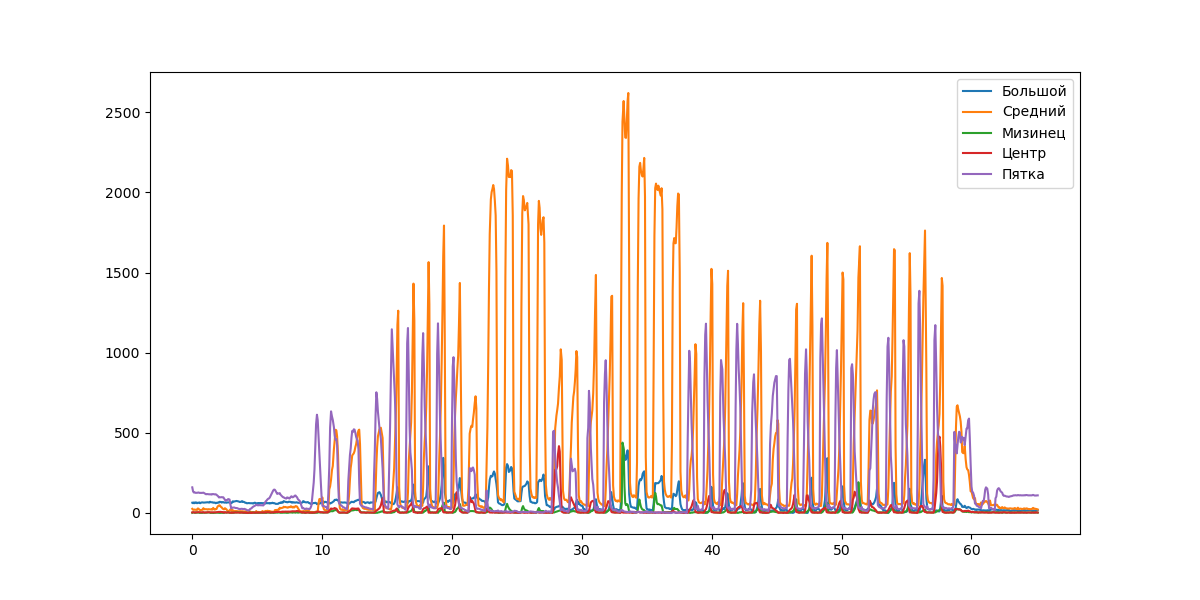

In [16]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib widget
df_data = pd.read_csv(fname, sep=' ', header=None)
times = df_data.iloc[:, -1]
times -= times.min()
times/=1000


fig, axx = plt.subplots(1,1, sharex=True, figsize=(12,6))

plt.plot(times,  -df_data.iloc[:, 0:5] + df_data.iloc[:, 0:5].max())
plt.legend(['Большой', 'Средний', 'Мизинец', 'Центр', 'Пятка'])

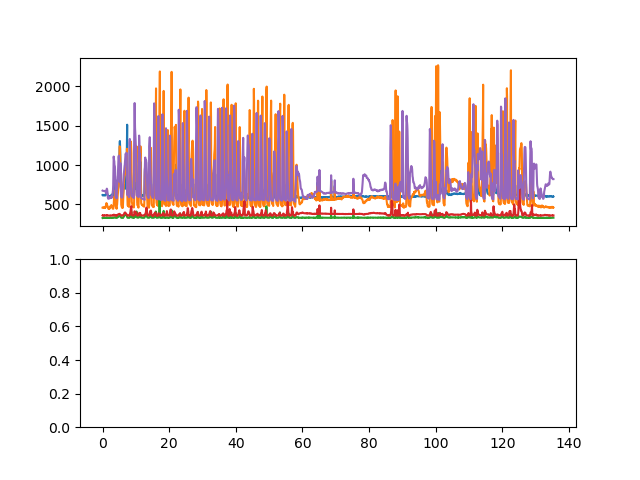

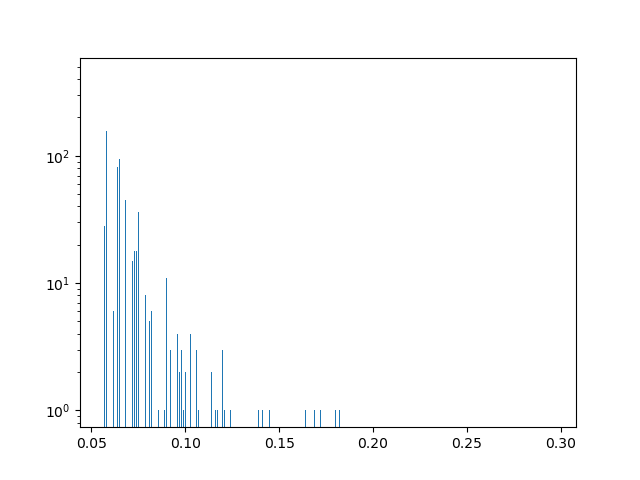

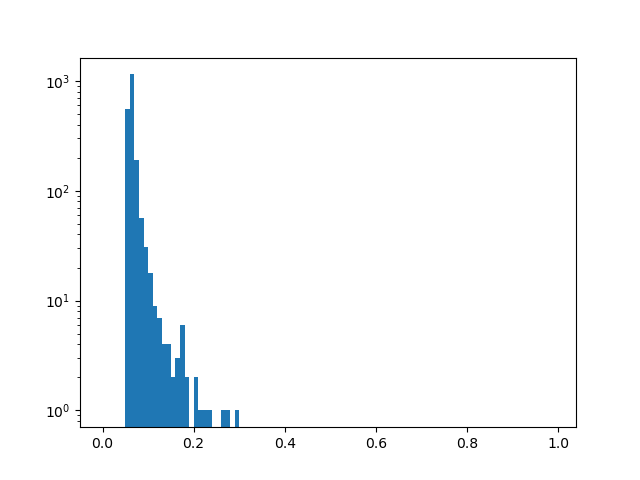

In [6]:
plt.figure()
plt.hist(times.diff(), bins=1000);
plt.yscale('log')

plt.figure()
plt.hist(times.diff(), bins=np.arange(0, 1, 0.010));
plt.yscale('log')

Text(0.5, 0, 'Время, с')

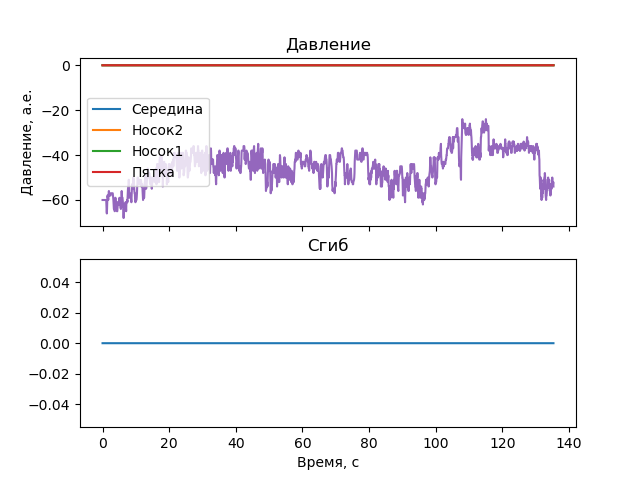

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib widget
df_data = pd.read_csv(fname, sep=' ', header=None)
times = df_data.iloc[:, -1]
times -= times.min()
times/=1000


fig, axx = plt.subplots(2,1, sharex=True)

plt.sca(axx[0])
plt.plot(times, df_data.iloc[:, 6:-1])
plt.ylabel('Давление, а.е.')
plt.title('Давление')
plt.legend(['Середина', 'Носок2', 'Носок1', 'Пятка'])

plt.sca(axx[1])
plt.plot(times, df_data.iloc[:, 5])
plt.title('Сгиб')
plt.xlabel('Время, с')